<a href="https://colab.research.google.com/github/stonewallmhk/QuantMindi/blob/main/ModernPortfolioTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementiong Modern Portfolio Theory**
<br>

*   Modern Portfolio Theory (MPT) is a mathematical framework for grouping a
portfolio of assets (stocks) such that the expected return is maximized for a given level of risk.
*   This notebook intends to find the ***EFFICIENT FRONTIER***. It is the optimal portfolio that offers highest expected return for a defined level of risk.
*   I chose stocks that gave best returns in the last 10 yrs according to the below article.
<br>
https://www.thisismoney.co.uk/money/investing/article-7895673/The-10-performing-shares-decade-revealed-Ashtead-earned-highest-total-returns.html
<br><br>
Stocks selected: ['AHT.L', 'MRO.L', 'RMV.L', 'HWDN.L', 'HLMA.L']



In [1]:
# Install yahoo finance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

Declare few variable which will be used later in the code

In [38]:
# on average there are 252 trading days in a year
NUM_TRADING_DAYS = 252

NUM_PORTFOLIOS = 10000

# stocks to handle
stocks =  ['AHT.L', 'MRO.L', 'RMV.L', 'HWDN.L', 'HLMA.L']

# Historical data
start_date = '2013-01-01'
end_date = '2023-01-01'

Download data

In [39]:
def download_data():
  #name of the stock (key) - stock values (2010-2017)
  stock_data = {}

  for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']

  return pd.DataFrame(stock_data)

dataset = download_data()
dataset.head()

,AHT.L,MRO.L,RMV.L,HWDN.L,HLMA.L
Date,,,,,
2013-01-02 00:00:00+00:00,382.845764,38.660175,127.318962,138.438171,406.730988
2013-01-03 00:00:00+00:00,375.622284,38.610512,128.020416,134.592667,404.958649
2013-01-04 00:00:00+00:00,374.676331,38.693283,129.335724,135.769852,407.616974
2013-01-07 00:00:00+00:00,376.138184,38.345608,129.861832,135.377457,404.870026
2013-01-08 00:00:00+00:00,379.061981,38.693283,130.475677,131.845856,400.173553


In [40]:
def show_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

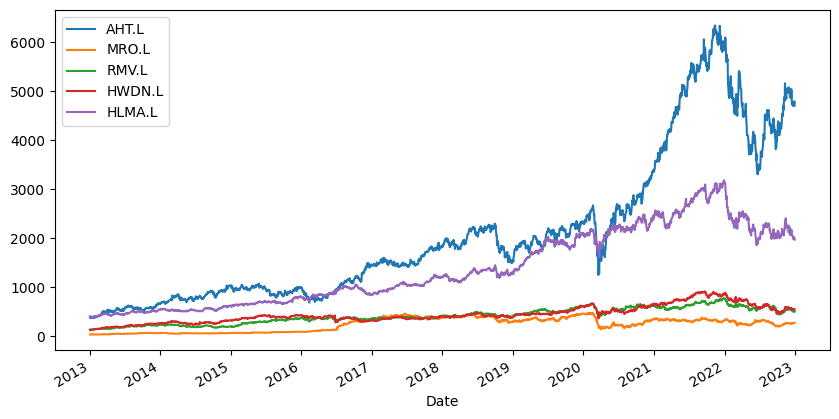

In [41]:
show_data(dataset)

As per the above plot, Astrazenca (AZN) is more relatively more costly than others.

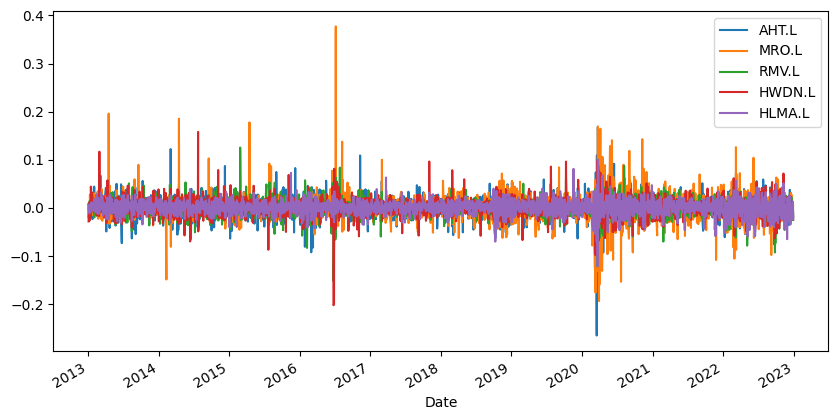

In [42]:
def calculate_returns(data):
  #Normalization of returns
  log_return = np.log(data/data.shift(1))
  return log_return[1:]

returns = calculate_returns(dataset)
show_data(returns)

Plotting daily returns shows the stocks volatility. <br>
In the above plot except for BP and AZN which have distinct spikes, others are relatively consistent.

In [43]:
# We find the mean annual returns and well as covariance of stock returns.
# covariance shows how each stocks returns is moving in relation to the other.

def show_statistics(returns):
  # instead of daily metrics, we need annual metrics
  # mean of annual return
  print(returns.mean() * NUM_TRADING_DAYS)
  print(returns.cov() * NUM_TRADING_DAYS)

show_statistics(returns)

AHT.L     0.250359
MRO.L     0.197019
RMV.L     0.137807
HWDN.L    0.137288
HLMA.L    0.157591
dtype: float64
           AHT.L     MRO.L     RMV.L    HWDN.L    HLMA.L
AHT.L   0.121086  0.065537  0.041970  0.046742  0.041081
MRO.L   0.065537  0.182570  0.035118  0.043461  0.033441
RMV.L   0.041970  0.035118  0.076392  0.042844  0.030527
HWDN.L  0.046742  0.043461  0.042844  0.089050  0.027883
HLMA.L  0.041081  0.033441  0.030527  0.027883  0.053829


In [21]:
def show_mean_variance(returns, weights):
  # Annual returns
  portfolio_returns = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS

  # portfolio volatility = SQRT(W^t (weights transposed) * (Covariance Matrix) * W (weights))
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))

  print("Expected Portfolio Mean (returns): ", portfolio_returns)
  print("Expected Portfolio Volatility (STD): ", portfolio_volatility)

In [46]:
# Generate random weights for each stock totalling to 1 and generate 10,000 portfolios

def generate_portfolios(returns):
  portfolio_means = []
  portfolio_risks = []
  portfolio_weights = []

  for _ in range(NUM_PORTFOLIOS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    portfolio_means.append(np.sum(returns.mean() * w) * NUM_TRADING_DAYS)
    portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov()
                                                      * NUM_TRADING_DAYS, w))))

  return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

# Sharpe Ratio is Returns / Volatility. Higher the Sharpe Ratio better is the portfolio performance (ideally greater than 1)

def show_portfolios(returns, volatilities):
  plt.figure(figsize=(10, 6))
  plt.scatter(volatilities, returns, c=returns / volatilities, marker='o')
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.show()



In [44]:
weights, means, risks = generate_portfolios(returns)


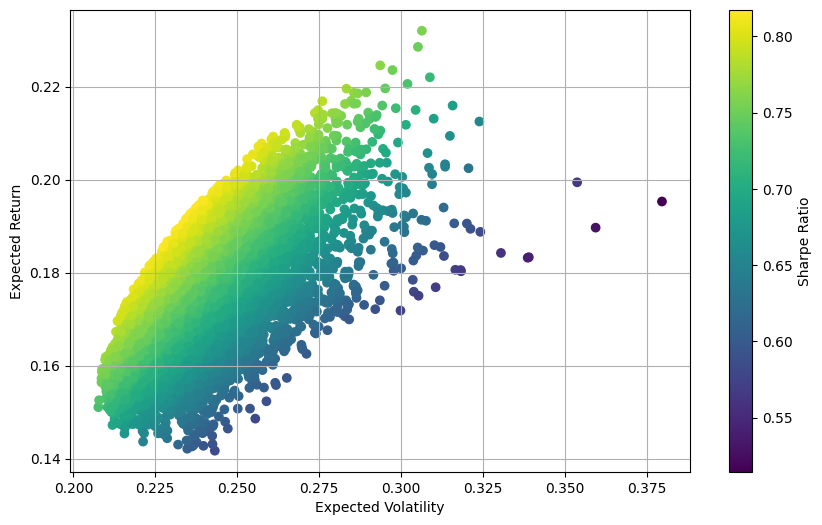

In [45]:
show_portfolios(means, risks)

In [49]:
def statistics(weights, returns):
  portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()
                                                          * NUM_TRADING_DAYS, weights)))
  return np.array([portfolio_return, portfolio_volatility,
                    portfolio_return / portfolio_volatility])

# scipy optimize module can find the minimum of a given function
# the maximum of a f(x) is the minimum of -f(x)
def min_function_sharpe(weights, returns):
  return -statistics(weights, returns)[2]

# what are the constraints? The sum of weights = 1 !!!
# f(x)=0 this is the function to minimize
def optimize_portfolio(weights, returns):
  # the sum of weights is 1
  constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
  # the weights can be 1 at most: 1 when 100% of money is invested into a single stock
  bounds = tuple((0, 1) for _ in range(len(stocks)))
  return optimization.minimize(fun=min_function_sharpe, x0=weights[0], args=returns
                                , method='SLSQP', bounds=bounds, constraints=constraints)


def print_optimal_portfolio(optimum, returns):
  print("Optimal portfolio: ", optimum['x'].round(3))
  print("Expected return, volatility and Sharpe ratio: ",
        statistics(optimum['x'].round(3), returns))

def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
  plt.figure(figsize=(10, 6))
  plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets / portfolio_vols, marker='o')
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'g*', markersize=20.0)
  plt.show()

Optimal portfolio:  [0.353 0.073 0.086 0.035 0.453]
Expected return, volatility and Sharpe ratio:  [0.19080449 0.23323053 0.81809399]


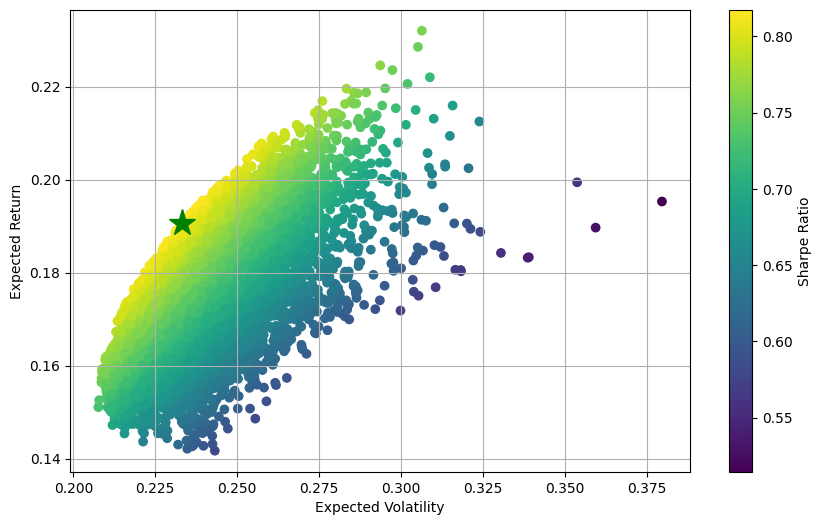

In [50]:
optimum = optimize_portfolio(weights, returns)
print_optimal_portfolio(optimum, returns)
show_optimal_portfolio(optimum, returns, means, risks)

* Star represents the optimum portfolio for the selection of stocks taken
* Best sharpe ratio we can achieve with this portfolio selection is 0.82 (approx)